# Tutorial de Big Data (UdeSA) 2025
## Tutorial 5

### Métodos no paramétricos

### Métodos no paramétricos
El objetivo es predecir distribución de una variable de interés 
- 𝑌 variable de interés
- 𝑓(𝑌) distribución de 𝑌

Métodos
- Introducción a Numpy y Scikit-learn 
- Histogramas
- Kernels


## NumPy y scikit-learn
**El paquete NumPy** es fundamental en Python. Está escrito en lenguajes de bajo nivel, lo que permite realizar operaciones matemáticas de manera muy eficiente. Para más información, ver la [guía oficial de uso de NumPy](https://docs.scipy.org/doc/numpy/user/index.html).

**El paquete scikit-learn** es una biblioteca de Python usada para machine learning, construida encima de NumPy y otros paquetes. Permite procesar datos, reducir la dimensionalidad de la base, implementar regresiones, clasificaciones, clustering y más. Pueden ver la [web de scikit-learn](https://scikit-learn.org/stable/)


In [ ]:
#Installamos el paquete necesario
#!pip install scikit-learn

# Alternativa
import sys
!{sys.executable} -m pip install scikit-learn

In [1]:
# Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt

### Numpy

A continuación crearemos dos vectores con los que trabajaremos en nuestra primera regresión lineal.

In [3]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)
# Ambos son vectores fila

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [5]:
# Reshape para transformar x en un vector columna
x = x.reshape((-1, 1))   # El -1 indica el largo del array
# Es equivalente a: x = x.reshape((6, 1))

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


## Histogramas


Podemos usar hist de Matplotlib. Ver documentación [acá](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Generamos datos
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,500), np.random.normal(5,1,500)]).reshape(-1,1)
X

array([[ 8.83893113e-01],
       [ 1.95865022e-01],
       [ 3.57536516e-01],
       [-2.34326191e+00],
       [-1.08483259e+00],
       [ 5.59696289e-01],
       [ 9.39469350e-01],
       [-9.78481042e-01],
       [ 5.03096840e-01],
       [ 4.06414469e-01],
       [ 3.23461010e-01],
       [-4.93410882e-01],
       [-7.92016791e-01],
       [-8.42367934e-01],
       [-1.27950266e+00],
       [ 2.45715170e-01],
       [-4.41948007e-02],
       [ 1.56763255e+00],
       [ 1.05110868e+00],
       [ 4.06368426e-01],
       [-1.68646101e-01],
       [-3.18970279e+00],
       [ 1.12013226e+00],
       [ 1.33277821e+00],
       [-2.43338766e-01],
       [-1.30030711e-01],
       [-1.09017371e-01],
       [ 1.55618644e+00],
       [ 1.28778353e-01],
       [-2.06694872e+00],
       [-8.85493155e-01],
       [-1.10457948e+00],
       [ 9.32866347e-01],
       [ 2.05983800e+00],
       [-9.34937958e-01],
       [-1.61299022e+00],
       [ 5.27069718e-01],
       [-1.55110074e+00],
       [ 3.2

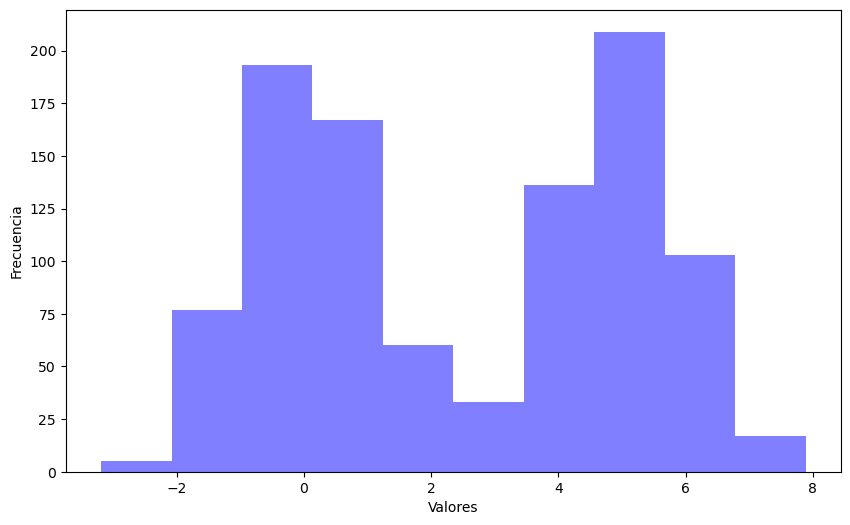

In [11]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, color='blue', alpha=0.5) # por default, 10 bins
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

A mayor número de barras (bins en ingles), menos observaciones se acumulan en cada bin (notar diferencia de escala en el eje y), como muestra el siguiente gráfico

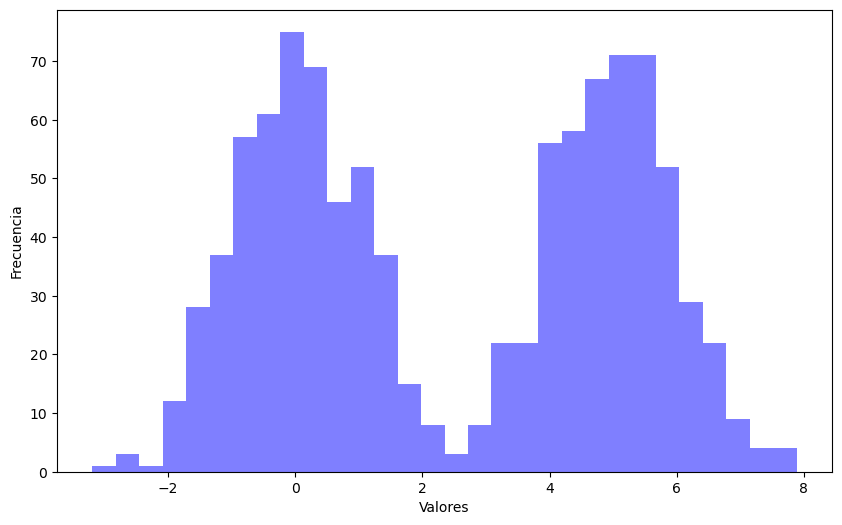

In [13]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

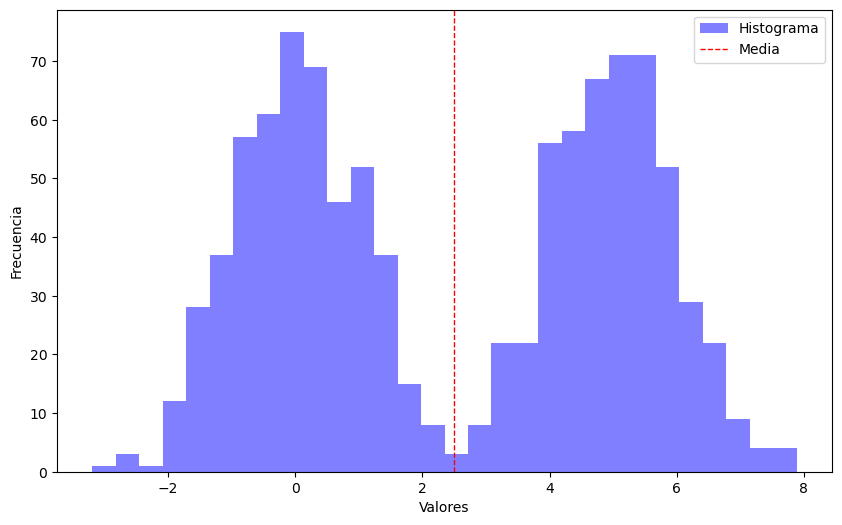

In [15]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Agregamos línea vertical con la media
mean_value = np.mean(X)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()  # Show legend with label for the mean line
plt.show()

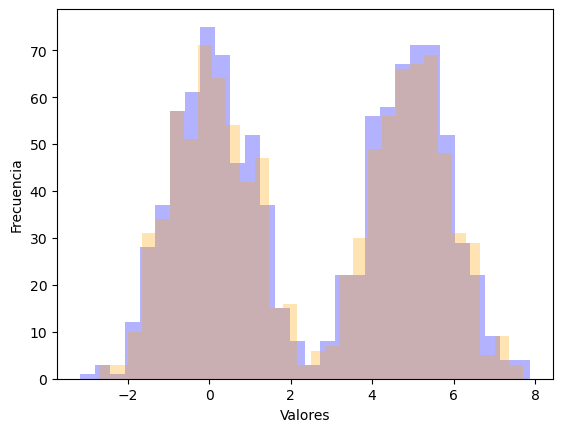

In [17]:
# Definimos un criterio para "cortar" outliers (por ejemplo, a 2 DE de la media)
mean_value = np.mean(X)
std_dev = np.std(X)
lower_bound = mean_value - 2 * std_dev
upper_bound = mean_value + 2 * std_dev

# Filtramos los datos
X_filtered = X[(X >= lower_bound) & (X <= upper_bound)]

# Plot histogram of filtered data
plt.hist(X, bins=30, alpha=0.3, color='blue', label='Histograma')
plt.hist(X_filtered, bins=30, alpha=0.3, color='orange', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

También podemos usar algunas funciones de seaborn para graficar histogramas. Ver documentación [acá](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)


In [ ]:
# Primero, installamos el paquete
import sys
!{sys.executable} -m pip install seaborn

In [ ]:
# Segundo, algunos tal vez necesiten el update
pip install -U seaborn

In [19]:
import seaborn as sns

In [20]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


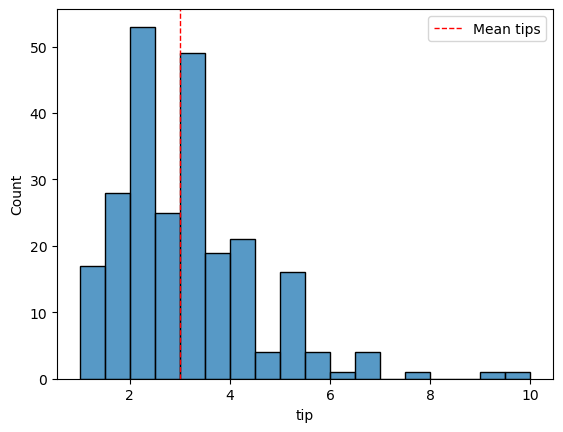

In [23]:
sns.histplot(data=tips['tip'])
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Mean tips')
plt.legend()  # Nos muestra la leyenda para la media de tips
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarnin

<Axes: xlabel='tip', ylabel='Count'>

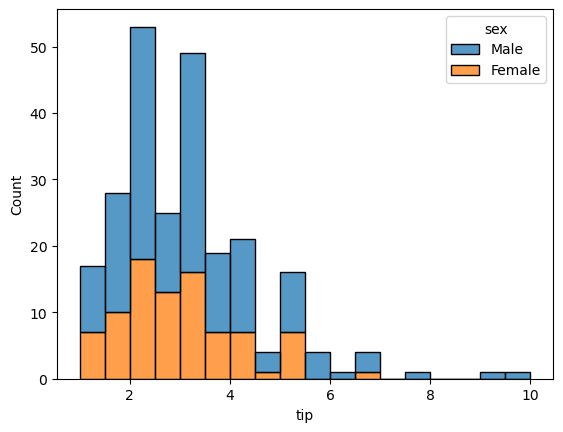

In [25]:
sns.histplot(data=tips, x="tip", hue="sex", multiple="stack") #podemos hacer el histograma por grupos: varon, mujer

Podemos sumar la estimación de la densidad usando un Kernel (Gaussiano)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarnin

<Axes: xlabel='tip', ylabel='Percent'>

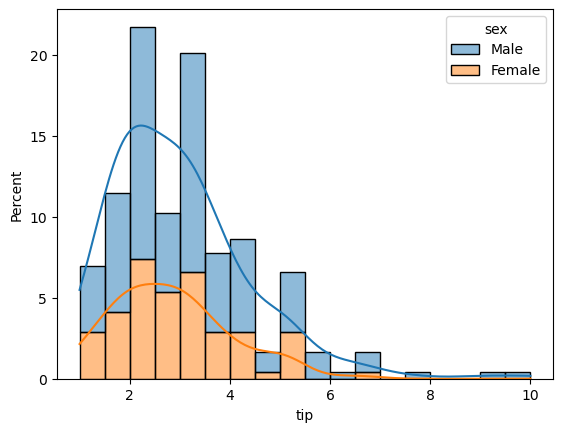

In [27]:
sns.histplot(data=tips, x="tip", hue="sex", stat="percent", multiple="stack",  kde=True)

## Kernels

Kernel:
A cada observación le estima una pequeña función de densidad y suma todas las pequeñas funciones

$$
𝑓(𝑦_0)= \frac{1}{n} ∑^𝑛_i  \frac{1}{h} 𝐾(\frac{𝑌_𝑖−𝑦_0}{h}) 
$$

- 𝐾(𝑧)  función Kernel continua (y generalmente) simétrica 
- ℎ ancho de banda (smoothing bandwidth) --> Controla qué tan “suave” es la densidad 


Vamos a usar el [módulo neighbors de Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html)

Para estimar una densidad usando kernels tenemos la siguiente función: 

<code> sklearn.neighbors.KernelDensity(*, bandwidth=1.0, algorithm='auto', kernel='gaussian', metric='euclidean', atol=0, rtol=0, breadth_first=True, leaf_size=40, metric_params=None)</code>

donde algunos parámetros importantes son:
- <code>bandwidth</code> (valor por default: 1.0)
- <code>kernel</code> (valor por default: 'gaussian')

Scikit learn nos permite cambiar el kernel y probar varios y cuál ajusta mejor a los datos

In [ ]:
#Primero instalamos sklearn (Seguimos las instrucciones de https://github.com/scikit-learn/sklearn-pypi-package)
import sys
!{sys.executable} -m pip install scikit-learn

In [ ]:
# Tambien se necesita el siguiente modulo: scipy, base
import sys
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install base
#!pip install -U scikit-learn # update del paquete sklearn/scikit-learn
!{sys.executable} -m pip install --upgrade pandas
!{sys.executable} -m pip install --upgrade numpy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KernelDensity

#### Tipos de kernels (disponibles en Scikit learn)

In [ ]:
# Kernels
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 
  
# Figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2) 
# Tamaño de la figura
fig.set_figheight(15) 
fig.set_figwidth(10)   
# Título 
fig.suptitle("Tipos de kernels") 

# 1D array de valores de x para graficar la distribución 
x_plot = np.linspace(-6, 6, 1000) # 1000 valores de -6 a 6 separados con la misma distancia entre sí
x_plot = x_plot.reshape(-1,1) # formato 2D array (necesario para scikit learn)
x_orig = np.zeros((1, 1)) # punto (0,0)
  
# Graficamos usando los distintos kernels 
for i, kernel in enumerate(kernels): 
    # Ajustamos el modelo 
    kde = KernelDensity(kernel=kernel).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
      
    # Distribuciones 
    ax[i // 2, i % 2].fill(x_plot[:, 0], np.exp(log_dens)) 
    # i//2 nos permite referirnos a la fila del subplot, e i%2 nos permite referirnos a la columna
    # Título y labels de los subplots 
    ax[i // 2, i % 2].set_title(kernel.capitalize()) 
    ax[i // 2, i % 2].set_xlim(-3, 3) 
    ax[i // 2, i % 2].set_ylim(0, 1) 
    ax[i // 2, i % 2].set_ylabel("Densidad") 
    ax[i // 2, i % 2].set_xlabel("x") 
plt.show()

De la misma forma, en un gráfico

In [ ]:
# Kernels
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 
  
# Grafico
plt.figure(figsize=(10,6))

for k in kernels:
    # Ajustamos el modelo 
    kde = KernelDensity(kernel=k).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
    
    # Graficar la estimacion para cada kernel
    plt.plot(x_plot[:,0], np.exp(log_dens), label=f'{k.capitalize()} Kernel')

plt.legend()
plt.title('Estimación con diferentes Kernels')
plt.show()

Ahora veamos qué ocurre si para un mismo kernel, cambiamos los **anchos de banda**

In [ ]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 
  
# Figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2) 
# Tamaño de la figura
fig.set_figheight(15) 
fig.set_figwidth(10)   
# Título 
fig.suptitle('Kernel Gaussiano, con distintos anchos de banda')

# Graficamos usando los distintos kernels 
for i, bw in enumerate(bandwidths): 
    # Ajustamos el modelo 
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
      
    # Distribuciones 
    ax[i // 2, i % 2].fill(x_plot[:, 0], np.exp(log_dens)) 
    # i//2 nos permite referirnos a la fila del subplot, e i%2 nos permite referirnos a la columna
    # Título y labels de los subplots 
    ax[i // 2, i % 2].set_title('Kernel Gaussiano con bandwidth='+str(bw)) 
    ax[i // 2, i % 2].set_xlim(-3, 3) 
    ax[i // 2, i % 2].set_ylim(0, 1) 
    ax[i // 2, i % 2].set_ylabel('Densidad') 
    ax[i // 2, i % 2].set_xlabel('x') 
plt.show()

In [ ]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 
  
# Grafico
plt.figure(figsize=(10,6))

for bw in bandwidths:
    # Ajustamos el modelo 
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
    
    # Graficar la estimacion para cada kernel
    plt.plot(x_plot[:,0], np.exp(log_dens), label='Kernel Gaussiano con bandwidth='+str(bw))

plt.legend()
plt.title('Kernel Gaussiano, con distintos anchos de banda') 
plt.show()

Ahora veamos un ejemplo con datos ficticios

In [ ]:
from scipy.stats import norm

In [ ]:
# Creamos una distribución
n = 100
np.random.seed(10)
X = np.concatenate((np.random.normal(0, 1, int(0.6 * n)), np.random.normal(10, 1, int(0.4 * n)))) 
# Creamos X concatenando datos de dos distribuciones normales
# primero 60 datos de una distribución normal con media 0 y desvío 1
# luego, 40 datos de una normal con media 10 y desvío 1
X = X.reshape(-1,1)

X_plot = np.linspace(-5, 15, 1000).reshape(-1,1)
# Usaremos X para estimar la densidad y calcularemos la densidad para los puntos de X_plot 

# Calcular la "verdera" densidad para los puntos X_plot
true_density = 0.6 * norm(0, 1).pdf(X_plot[:, 0]) + 0.4 * norm(10, 1).pdf(X_plot[:, 0]) 
  
# Gráfico
fig, ax = plt.subplots() 
  
# Gráfico de la verdadera densidad 
ax.fill( 
    X_plot[:, 0], true_density,  
    fc='black', alpha=0.2,  
    label='Distribución'
) 
  
# Estimar la densidad de X usando kernel gaussiano y bandwidth de 0.5 
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X) 
# Log de la PDF 
log_dens = kde.score_samples(X_plot) 
  
# Densidad 
ax.plot( 
    X_plot[:, 0], np.exp(log_dens), 
    color='blue', 
    linestyle='-', 
    label='Densidad con kernel Gaussiano'
)  
ax.set_xlim(-4, 15) 
ax.set_ylim(0, 0.3) 
#ax.grid(True) 
ax.legend(loc='upper right') 

plt.show()

Otro ejemplo probando kernels

In [ ]:
# Generamos datos
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,500), np.random.normal(5,1,500)]).reshape(-1,1)
X

# Rango de valores para eje x
X_plot = np.linspace(min(X), max(X), 1000).reshape(-1,1)
#X_plot

In [ ]:
# Lista de kernels a probar
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 

# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, density=True, alpha=0.5, color='blue', label='Histograma')

for k in kernels:
    kde = KernelDensity(kernel=k).fit(X)
    
    # Usar la KDE para estimar la densidad para cada valor de X
    log_densities = kde.score_samples(X_plot)
    densities = np.exp(log_densities)
    
    # Graficar para cada kernel
    plt.plot(X_plot[:,0], densities, label=f'{k.capitalize()} Kernel')

plt.legend()
plt.title('Estimación con diferentes Kernels')

Para elegir el bandwidth con CV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grilla de posibles anchos de banda
bandwidths = 10 ** np.linspace(-1, 1, 10)
print(bandwidths)

# Datos con los que se estima KDE
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,50), np.random.normal(5,1,50)]).reshape(-1,1)
X

grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=5)
grid.fit(X)
grid.best_params_ #mejor ancho de banda (de los posibles dentro de la grilla)
best_bw = grid.best_params_['bandwidth']
best_bw

In [ ]:
# Repito lo mismo con el bandwidth óptimo

# Lista de kernels a probar
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 

# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, density=True, alpha=0.5, color='blue', label='Histograma')

for k in kernels:
    kde = KernelDensity(kernel=k, bandwidth = best_bw).fit(X)
    
    # Usar la KDE para estimar la densidad para cada valor de X
    log_densities = kde.score_samples(X_plot)
    densities = np.exp(log_densities)
    
    # Graficar para cada kernel
    plt.plot(X_plot[:,0], densities, label=f'{k.capitalize()} Kernel')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Estimación con diferentes Kernels')